# Netflix Data Analysis: Movies & TV Shows

[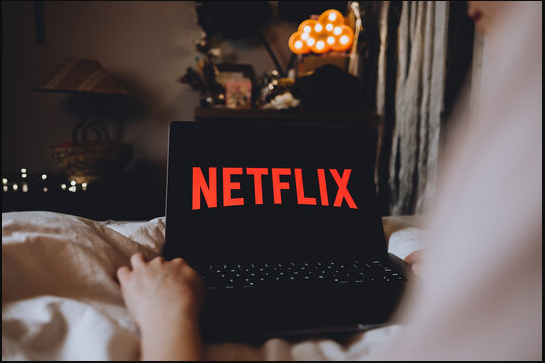](http://)

*Netflix is a leading American streaming and production company founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California, now headquartered in Los Gatos. Its core service is a subscription-based streaming platform featuring a vast library of films and TV shows, including original productions.*

*As of April 2020, Netflix boasted 193 million global subscribers, with 73 million in the U.S. The service is accessible nearly worldwide, excluding Mainland China (due to government restrictions), Iran, Syria, North Korea, and Crimea (due to U.S. sanctions).*

*The company operates offices in key markets, including France, the U.S., U.K., Brazil, the Netherlands, India, Japan, and South Korea. As a member of the Motion Picture Association (MPAA), Netflix produces and distributes content from diverse regions worldwide, reinforcing its position as a global entertainment leader.*

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [3]:
netflix= pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix.shape

(8807, 12)

In [5]:
netflix.isnull().sum() #checking for null values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

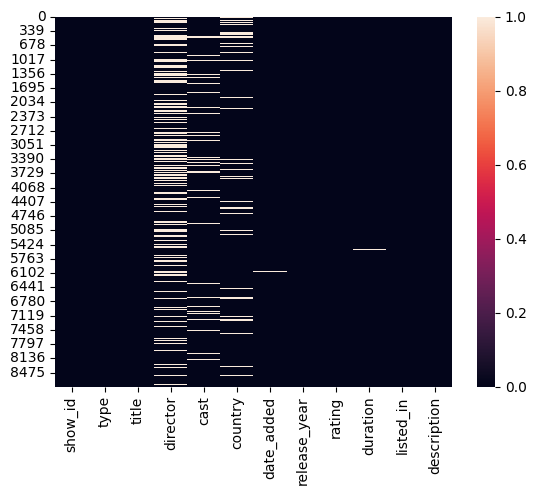

In [6]:
sns.heatmap(netflix.isnull())

*We have null values in director, cast, country,date added and rating.So, let's deal with it.*

In [7]:
#drop director and cast
netflix.drop(["director","cast"],axis =1,inplace=True)
netflix.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


*Here, We don't need Director, Cast from the Dataset to visualize & sincce these two column has missing values ,so we can drop them.*

In [8]:
netflix['country'].value_counts()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

*We can replace them with the United States.since, the United States has the largest number of shows, and Netflix was also created in the United States.*

In [9]:
netflix['country'].replace(np.nan, 'United States',inplace  = True)
netflix

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


*Here, we have already released year for each movie. So, we don't need a date added for our analysis. We can drop this date-added column.*

In [10]:
netflix.drop(['date_added'],axis =1,inplace = True)
netflix

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,United States,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,United States,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,United States,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [11]:
netflix['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

*Since the rating column has only 4 null values, let's replace the null values with TV-MA since they give the most amount of Rating.*

In [12]:
netflix["rating"].replace(np.nan,"TV-MA",inplace=True)
netflix.isnull().sum()

show_id         0
type            0
title           0
country         0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [13]:
netflix['duration'].value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

*Also, the duration column has only 3 null values, let's replace the null values with 1 Season.*

In [14]:
netflix["duration"].replace(np.nan,"1 Season",inplace=True)
netflix.isnull().sum()

show_id         0
type            0
title           0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

*So, here we successfully removed all the Null Values. Now, we can visualize our Data.*

In [15]:
#looking at number of Movies and TV shows
type_value = netflix['type'].value_counts()

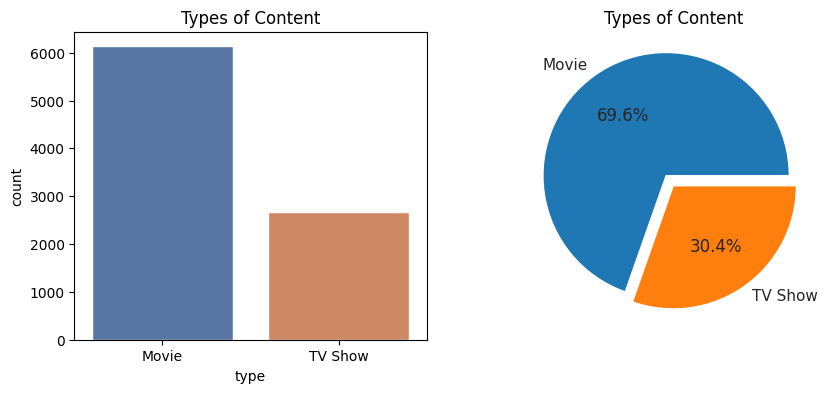

In [16]:
fig, axes = plt.subplots(1,2, figsize = (10,4))
sns.set()
sns.countplot(data = netflix, x = 'type', ax = axes[0])
axes[0].set_title('Types of Content')

sns.set()
axes[1].pie(type_value, labels = type_value.index, explode=[0.1, 0], autopct = '%1.1f%%')
axes[1].set_title('Types of Content')
plt.show()


*As a consequence, Netflix has around 4500 Movies & almost 2000 TV shows.*

<Axes: xlabel='rating', ylabel='count'>

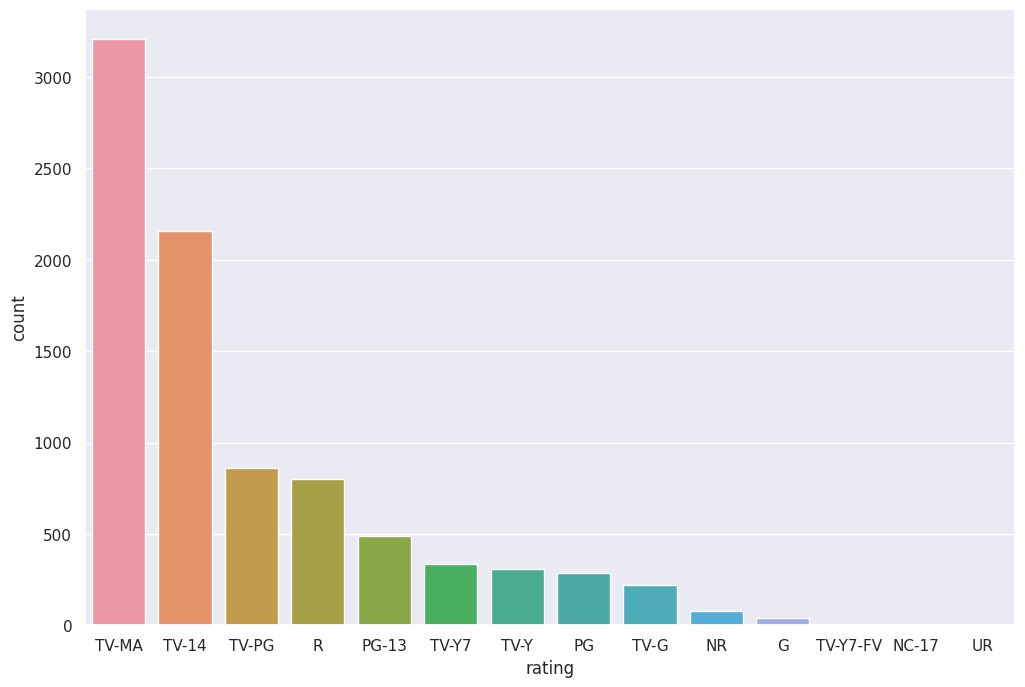

In [17]:
sns.set()
plt.figure(figsize=(12,8))
sns.countplot(x="rating",data=netflix, order= netflix['rating'].value_counts().index[0:14])

*As a consequence,  most of the ratings are given by TV-MA rather than TV-14.*

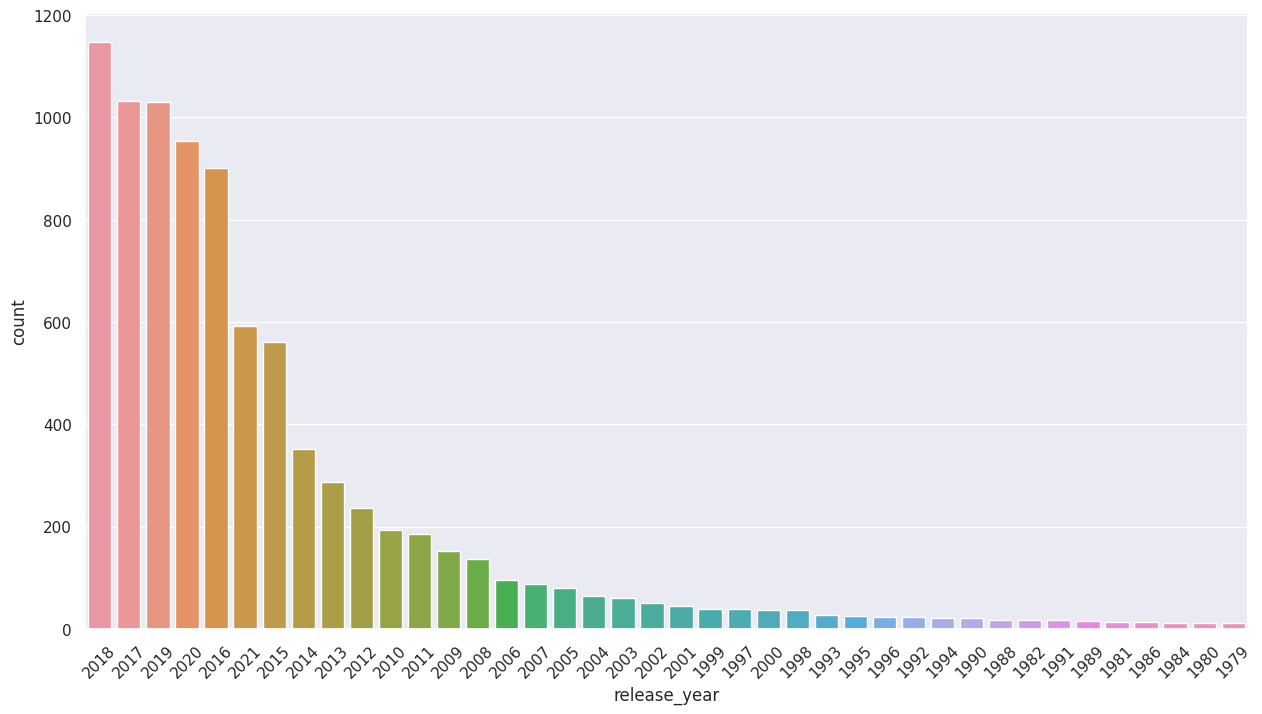

In [18]:
sns.set()
plt.figure(figsize=(15,8))
sns.countplot(x="release_year",data= netflix,order = netflix['release_year'].value_counts().index[0:40])
plt.xticks(rotation=45)
plt.show()

*As a consequence, the highest number of Movies & TV shows was released in the Year 2018.*

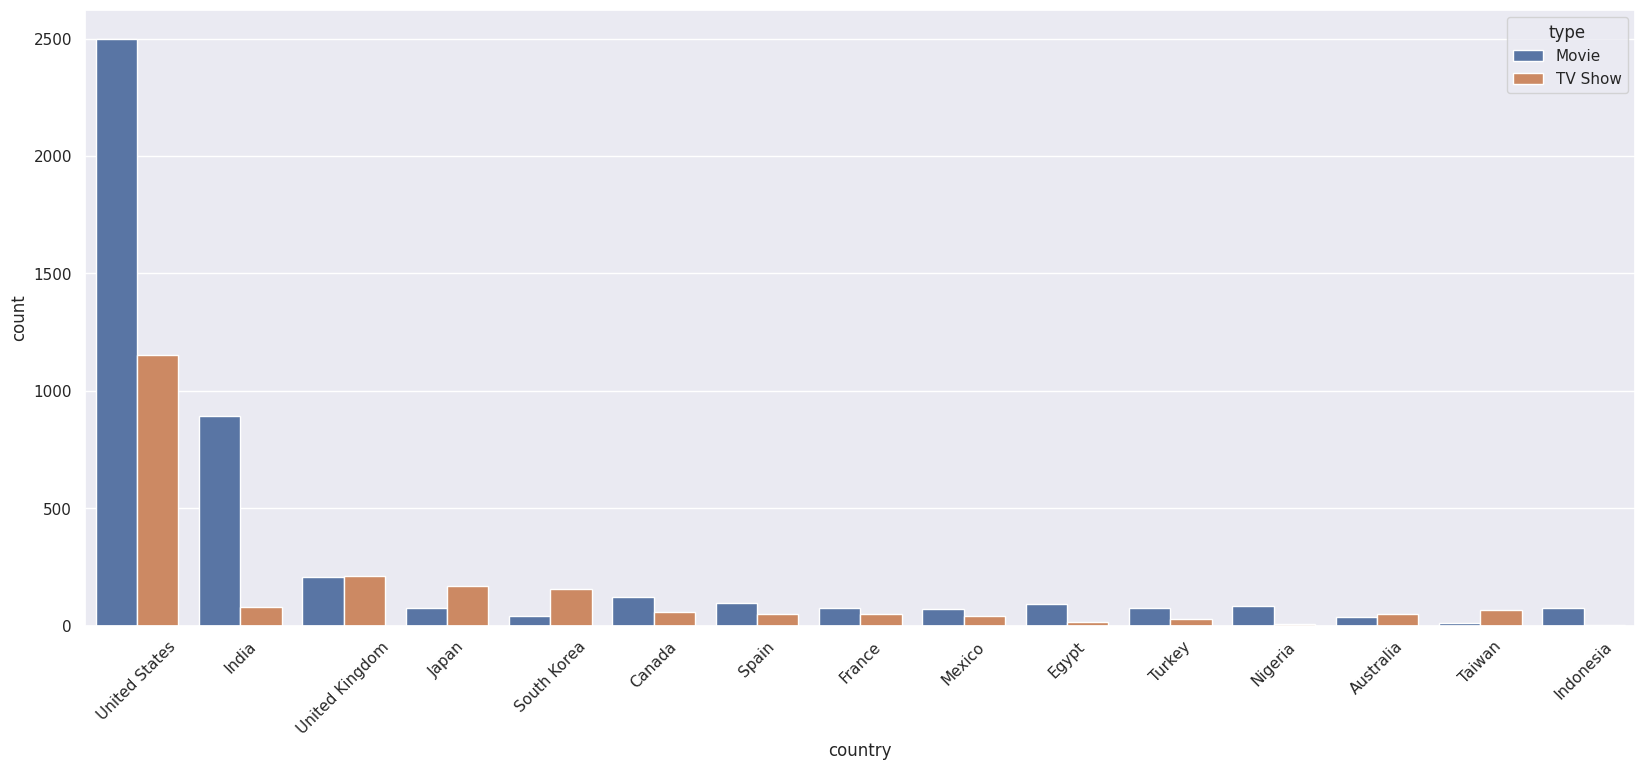

In [19]:
sns.set()
plt.figure(figsize=(20,8))
sns.countplot(x="country",data= netflix,hue= "type",order = netflix['country'].value_counts().index[0:15])
plt.xticks(rotation=45)
plt.show()

*As a consequence, USA provides the Highest number of Movies & Tv Shows and then at 2nd place India provides the Highest number of Movies.*

In [20]:
netflix["listed_in"]

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'International Movies'),
  Text(1, 0, 'Dramas'),
  Text(2, 0, 'Comedies'),
  Text(3, 0, 'International TV Shows'),
  Text(4, 0, 'Documentaries'),
  Text(5, 0, 'Action & Adventure'),
  Text(6, 0, 'TV Dramas'),
  Text(7, 0, 'Independent Movies'),
  Text(8, 0, 'Children & Family Movies'),
  Text(9, 0, 'Romantic Movies')])

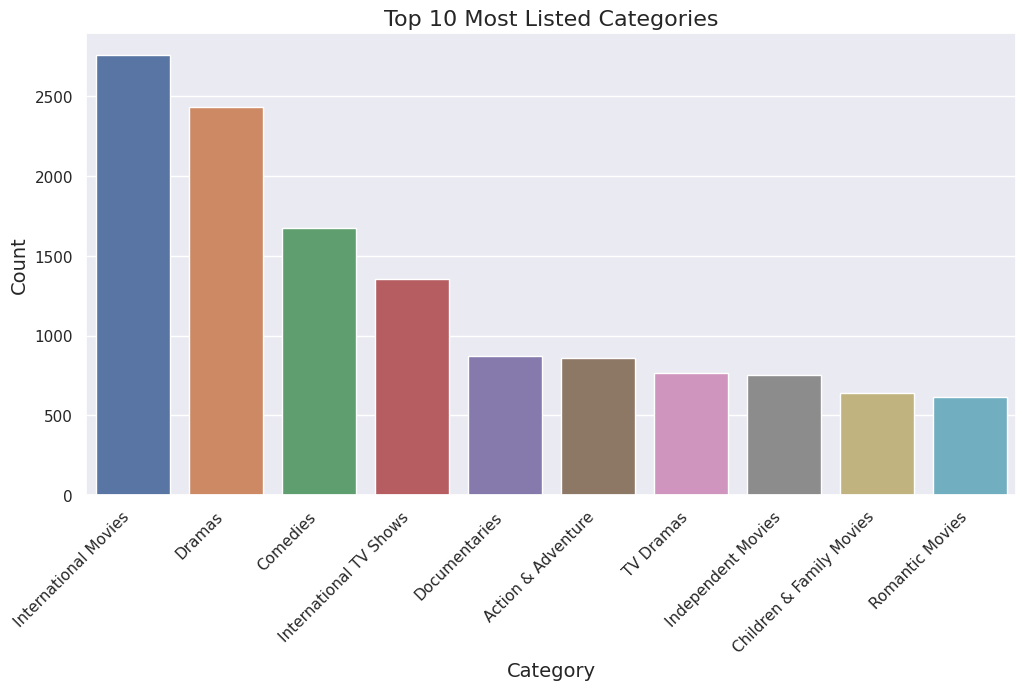

In [21]:
categories = netflix['listed_in'].str.split(',').explode().str.strip()  
top_10_categories = categories.value_counts().head(10)

sns.set()
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values)

plt.title('Top 10 Most Listed Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')

As a consequence, the international movies categories have the Highest number of listed.

In [22]:
Horror = netflix[netflix["listed_in"].isin(["Horror Movies","Thrillers"])]["release_year"].value_counts()

Text(0.5, 1.0, 'Horror Movie Distribution by Year (First 10 Years)')

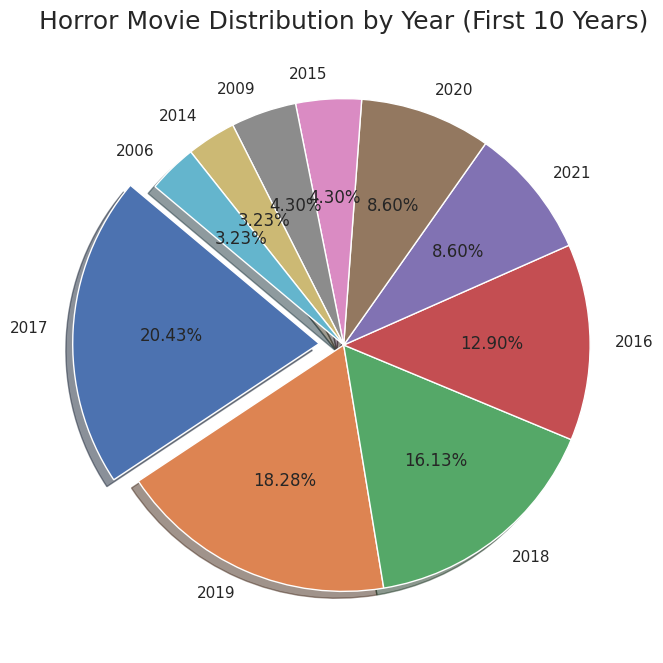

In [23]:
sns.set()
top_10_horror = Horror.sort_values(ascending=False).head(10)

explode = [0.1 if value == top_10_horror.max() else 0 for value in top_10_horror.values]

plt.figure(figsize=(8, 8))
plt.pie(top_10_horror.values, labels=top_10_horror.index, autopct='%2.2f%%', explode=explode, startangle=140, shadow = 0.6)

plt.title("Horror Movie Distribution by Year (First 10 Years)", fontsize=18)


*As a consequence, most horror movies released in 2017 and 2019 are in second place.*

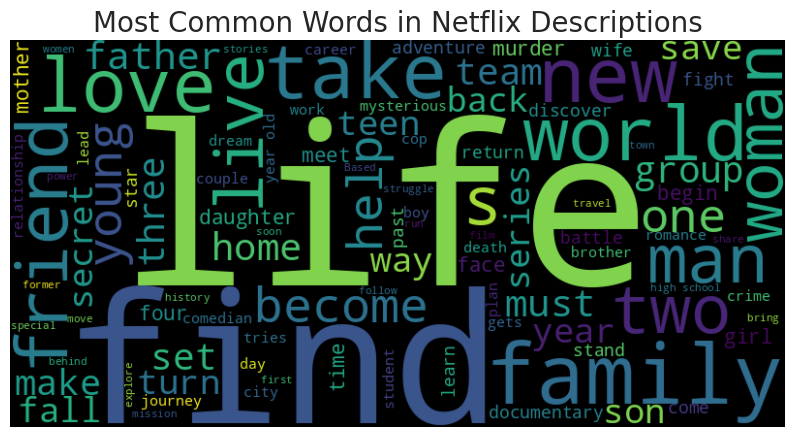

In [24]:
# Combine all descriptions
text = ' '.join(netflix['description'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black',
                      colormap='viridis', max_words=100).generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Descriptions', fontsize=20)
plt.show()

In [25]:
#oldest movies available on netflix
old = netflix.sort_values("release_year", ascending = True) 
old = old[old['duration'] != ""]
old[['title', "release_year"]][:15]

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925
7790,Prelude to War,1942
8205,The Battle of Midway,1942
8660,Undercover: How to Operate Behind Enemy Lines,1943
8739,Why We Fight: The Battle of Russia,1943
8763,WWII: Report from the Aleutians,1943
8640,Tunisian Victory,1944
8436,The Negro Soldier,1944
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
7930,San Pietro,1945


> List of old Movies on Netflix.

In [26]:
 #Kids TV shows on Netflix
tag = "Kids' TV" 
netflix["relevant"] = netflix['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
com = netflix[netflix["relevant"] == 1]
com[com["country"] == "United States"][["title", "country","release_year"]].head(10)

,title,country,release_year
34,Tayo and Little Wizards,United States,2020
40,He-Man and the Masters of the Universe,United States,2021
67,Saved by the Bell,United States,1994
85,Pokémon Master Journeys: The Series,United States,2021
87,Titipo Titipo,United States,2019
89,Mighty Raju,United States,2017
97,Kid Cosmic,United States,2021
100,Tobot Galaxy Detectives,United States,2019
106,Bunk'd,United States,2021
123,Luv Kushh,United States,2012


> List of Kids TV Shows on Netflix.

In [27]:
netflix_countries = pd.DataFrame(netflix.country.value_counts().reset_index().values, columns=["country", "count"])
netflix_countries.head()

,country,count
0,United States,3649
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199


> Countries Netflix movies/TV shows.

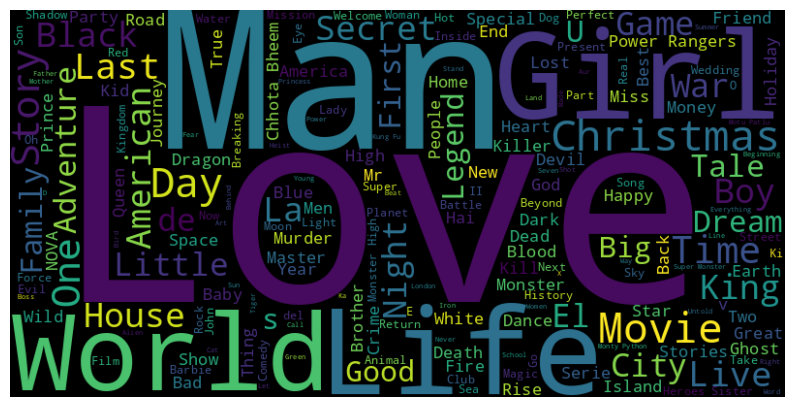

In [28]:
# WordCloud of Titles
wordcloud = WordCloud(width=800, height=400, background_color='black',
                      colormap='viridis').generate(" ".join(netflix.title))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.figure(1,figsize=(12,12))
plt.show()

In [29]:
# Prepare country data
country_counts = netflix['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Interactive world map
fig = px.choropleth(
    country_counts,
    locationmode='country names',
    locations='country',
    color='count',
    hover_name='country',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Netflix Content by Country'
)
fig.show()

> We see here the Netflix Content Production by Country.

**Conclusion:**

*This analysis reveals Netflix’s content strategy, highlighting its focus on movies, US-produced shows, and dramatic genres. The insights can help content creators understand market trends and viewers discover popular genres and directors. Future work could include sentiment analysis on descriptions or predicting content success.*

**Thanks for reading! If you found this helpful, please upvote 👍**